<a href="https://colab.research.google.com/github/ElwinGao4444/colab/blob/main/Tensorflow_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from keras import layers

# Sequential模型

## 模型初始化

In [3]:
# Define Sequential model with 3 layers
model = keras.Sequential(
    [   # 每个layers都可以当"函数"使用
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)
# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

## 模型修改

In [7]:
model = keras.Sequential(name="my_sequential")  # 初始化一个空Sequential模型
model.add(layers.Dense(2, activation="relu"))   # 通过add方法，追加layer
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))
model.pop() # 通过pop方法，删除layer
print(len(model.layers))

2


## 动态weight初始化

In [8]:
layer = layers.Dense(3) # layer输出feature数为3（?行3列）
print(layer.weights)    # 定义时，不初始化weight，因为不知道输入的feature数
x = tf.ones((1, 4))     # layer输入的样本数为1，feature数为4(1行4列)
y = layer(x)            # 第一次执行时，才知道输入的feature数，才能初始化weight
print(layer.weights)    # 4行3列，代表输入feature是4，输出feature是3

[]
[<tf.Variable 'dense_8/kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.85171616,  0.44975972,  0.10505223],
       [ 0.19646275, -0.36972088,  0.14572906],
       [ 0.746668  , -0.28941393, -0.16611195],
       [-0.27370858, -0.31808668, -0.6035128 ]], dtype=float32)>, <tf.Variable 'dense_8/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]


In [11]:
model = keras.Sequential(
    [
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)   # 此时无法summary，因为所有weight都未初始化
x = tf.ones((1, 4))
y = model(x)
model.summary() # 通过一次调用，所有参数初始化完成，可以看到model的完整结构

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (1, 2)                    10        
                                                                 
 dense_16 (Dense)            (1, 3)                    9         
                                                                 
 dense_17 (Dense)            (1, 4)                    16        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 静态weight初始化

In [14]:
model = keras.Sequential(
    [   # 前置一个Input对象，可以静态初始化model的结构
        keras.Input(shape=(4,)),    # Input并不是一个layer，所以不会在结构中显示
        layers.Dense(2, activation="relu"),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 2)                 10        
                                                                 
 dense_25 (Dense)            (None, 3)                 9         
                                                                 
 dense_26 (Dense)            (None, 4)                 16        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model = keras.Sequential(
    [   # 也可以通过在首个layer上增加input_shape参数来指定输入feature数
        layers.Dense(2, activation="relu", input_shape=(4,)),
        layers.Dense(3, activation="relu"),
        layers.Dense(4),
    ]
)

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 2)                 10        
                                                                 
 dense_31 (Dense)            (None, 3)                 9         
                                                                 
 dense_32 (Dense)            (None, 4)                 16        
                                                                 
Total params: 35 (140.00 Byte)
Trainable params: 35 (140.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 特征提取

In [19]:
initial_model = keras.Sequential(
    [
        keras.Input(shape=(250, 250, 3)),
        layers.Conv2D(32, 5, strides=2, activation="relu"),
        layers.Conv2D(32, 3, activation="relu", name="my_intermediate_layer"),
        layers.Conv2D(32, 3, activation="relu"),
    ]
)

# 提取全部特征参数
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],
)
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

# 提取指定layer的特征参数
feature_extractor = keras.Model(
    inputs=initial_model.inputs,
    outputs=initial_model.get_layer(name="my_intermediate_layer").output,
)
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

## 迁移学习

In [20]:
model = keras.Sequential([
    keras.Input(shape=(784)),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10),
])
model.save_weights('my_checkpoint')

# Presumably you would want to first load pre-trained weights.
model.load_weights('my_checkpoint')

# Freeze all layers except the last one.
for layer in model.layers[:-1]:
  layer.trainable = False

# Recompile and train (this will only update the weights of the last layer).
# model.compile(...)
# model.fit(...)

# 函数式 API

## 构建模型

Keras 函数式 API 是一种比 tf.keras.Sequential API 更加灵活的模型创建方式。

函数式 API 可以处理具有非线性拓扑的模型、具有共享层的模型，以及具有多个输入或输出的模型。

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_57 (Dense)            (None, 64)                50240     
                                                                 
 dense_58 (Dense)            (None, 10)                650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


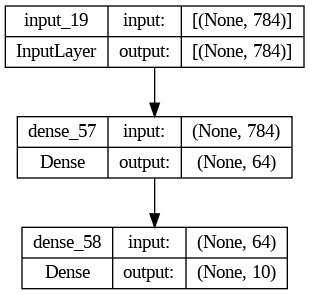

In [32]:
# 通过函数式API的方式，构建和Sequential等效的模型
inputs = keras.Input(shape=(784,))
x = inputs
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(10)(x)
outputs = x

# 创建模型，并观察模型的结构
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary() # 文本化输出模型结构
keras.utils.plot_model(model, "my_first_model.png", show_shapes=True) # 图形化输出模型结构

## 训练，评估和推断

In [36]:
# 构建数据集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() # 加载mnist数据集
x_train = x_train.reshape(60000, 784).astype("float32") / 255   # 将训练集的shape从(60000,28,28)变为(60000,784)
x_test = x_test.reshape(10000, 784).astype("float32") / 255     # 将测试集的shape从(60000,28,28)变为(60000,784)

# 编译模型（基于构建好的模型，设定损失函数、优化器、评价函数等）
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

# 执行训练（选定训练集、批次、轮次、验证集比例等）
history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

# 执行评估（给定测试集，评估训练结果）
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2
750/750 [==============================] - 5s 6ms/step - loss: 0.3721 - accuracy: 0.8967 - val_loss: 0.2111 - val_accuracy: 0.9417
Epoch 2/2
750/750 [==============================] - 3s 4ms/step - loss: 0.1917 - accuracy: 0.9450 - val_loss: 0.1602 - val_accuracy: 0.9553
313/313 - 0s - loss: 0.1628 - accuracy: 0.9535 - 499ms/epoch - 2ms/step
Test loss: 0.1628325879573822
Test accuracy: 0.953499972820282


## 保存和序列化

In [37]:
model.save("path_to_my_model")  # 保存模型
del model
model = keras.models.load_model("path_to_my_model") # 加载模型

## 所有模型均可像层一样调用

In [40]:
# 设置编码器
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
encoder = keras.Model(encoder_input, encoder_output, name="encoder")

# 设置解码器
decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")

# 通过编码器和解码器组织新的模型
autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                18672     
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         9569      
                                                                 
Total params: 28241 (110.32 KB)
Trainable params: 28241 (110.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 处理复杂的计算图拓扑

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_25 (Conv2D)          (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_26 (Conv2D)          (None, 28, 28, 64)           18496     ['conv2d_25[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_26[0][0]']           
 g2D)                                                                                    

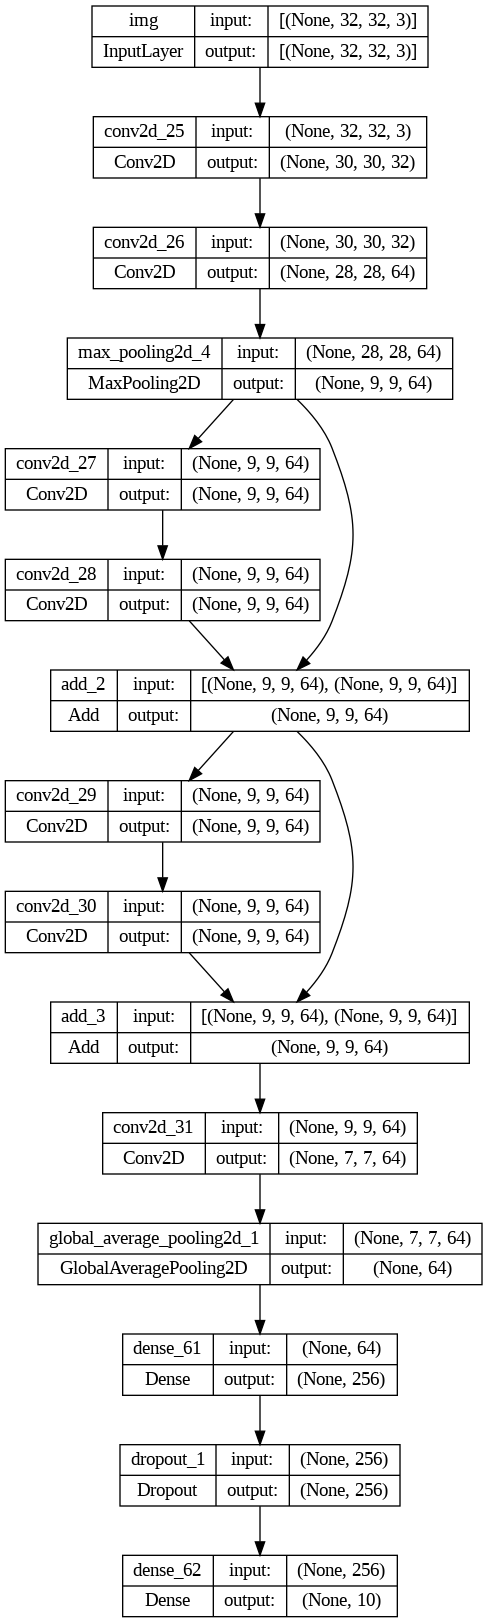

In [43]:
# 小ResNet模型
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

## 使用自定义层扩展 API

In [52]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)

# 使用内置方法进行训练和评估